<a href="https://colab.research.google.com/github/MathewsJosh/Topicos-Computacao-Cientifica-II/blob/main/Aula_06_DetectorCaracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detectores de Características

Nesse tutorial veremos como utilizar alguns detectores de características no OpenCV. Começaremos com a importação de bibliotecas e leitura da imagem. Utilizaremos a seguinte [imagem](https://drive.google.com/file/d/1Nvpch-60Wre4TyoQWS-HjYP40cglj-Sj/view?usp=sharing). A imagem precisará estar em escala de cinza e no formato `float32`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


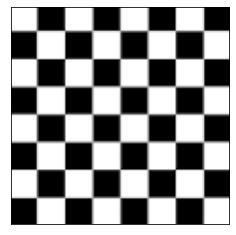

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread("/content/drive/MyDrive/ColabFiles/chessboard.png")

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

gray = np.float32(gray)

%matplotlib inline

plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

## 1 - Detector de Harris

O OpenCV possui o método `cornerHarris` que permite utilizar o detector de Harris. O método possui os seguintes parâmetros:
* A imagem de origem
* O tamanho da vizinhança para considerar na detecção (tamanho do *patch*)
* O tamanho do *kernel* para estimativa do gradiente pelo filtro de Sobel
* A constante do detector de Harris ($α$ na fórmula dos slides)
* O método de tratamento de borda (padding) (opcional, por default é por espelhamento)

Método retorna uma imagem com o valor da função de resposta para cada pixel.

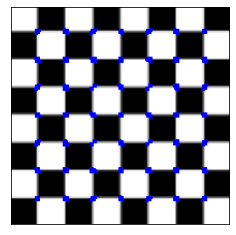

In [ ]:
harris = cv.cornerHarris(gray,2,3,0.04)

#Dilatação na imagem para facilitar a visualização dos pontos
harris = cv.dilate(harris,None)

#marcação dos pontos sobre a imagem original
image[harris > 0.05*harris.max()] = [0,0,255]

plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()

##2 - Detector de Shi-Tomasi

O detector de Shi-Tomasi (menor autovalor) pode ser utilizado pelo método `goodFeaturesToTrack`, o qual necessita dos seguintes parâmetros:
* A imagem de origem (8-bit ou float32)
* O número máximo de pontos retornados. Se o valor for $\leq 0$ não há limite para o máximo de pontos retornados
* O nível de qualidade que será multiplicado pelo valor de qualidade do melhor ponto obtido. Todos os pontos com qualidade inferior a esse produto serão rejeitados
* Distância Euclidiana mínima entre pontos retornados
* A região de interesse onde os pontos devem ser detectados (opcional, por *default* é a imagem toda
* Tamanho do *kernel* para cálculo dos gradientes (opcional, por *default* é 3)
* Uma *flag* que quando verdadeira permite utilizar o detector de Harris (opcional, por default é falsa)
* A constante do detector de Harris ($α$ na fórmula dos slides. Opcional, por *default* é 0.04)

Método retorna um vetor de pontos. A imagem utilizada pode ser encontrada [aqui](https://drive.google.com/file/d/1hMrd5_vXvyUMBuM6w5LqGlcnhM1Hs-b5/view?usp=sharing).

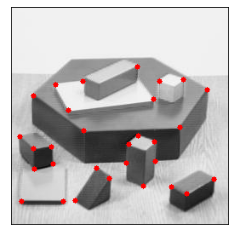

In [ ]:
image = cv.imread("/content/drive/MyDrive/ColabFiles/blox.jpg")

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray,30,0.01,10)
corners = np.int0(corners)

#desenha círculos nos corners
for i in corners:
    x,y = i.ravel()
    cv.circle(image,(x,y),3,255,-1)

plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()

## 3 - Exercícios

1. Varie os parâmetros do detector de Harris e analise os resultados

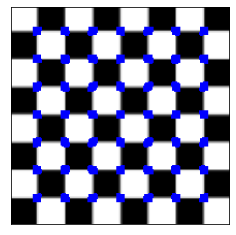

In [ ]:
image = cv.imread("/content/drive/MyDrive/ColabFiles/chessboard.png")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

gray = np.float32(gray)

harris = cv.cornerHarris(gray,5,1,0.04)

#Dilatação na imagem para facilitar a visualização dos pontos
harris = cv.dilate(harris,None)

#marcação dos pontos sobre a imagem original
image[harris > 0.05*harris.max()] = [0,0,255]

plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()

2. Utilize o método `goodFeaturesToTrack` para aplicar o detector de Harris.

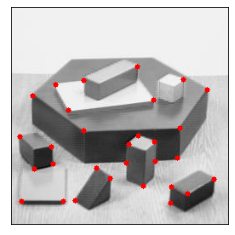

In [ ]:
image = cv.imread("/content/drive/MyDrive/ColabFiles/blox.jpg")

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray,30,0.01,10, useHarrisDetector = True)
corners = np.int0(corners)

#desenha círculos nos corners
for i in corners:
    x,y = i.ravel()
    cv.circle(image,(x,y),3,255,-1)

plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()

###3. Pesquise e teste outros métodos de detecção de *features* no OpenCV.

[Canny](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541)

0.5, 0.2


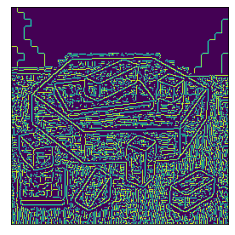

1, 255


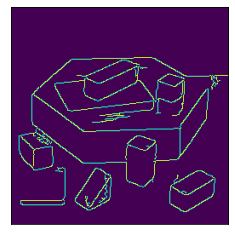

apertureSize = 3


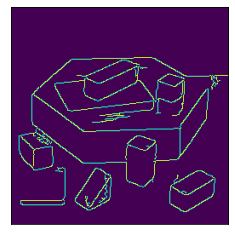

L2gradient = True


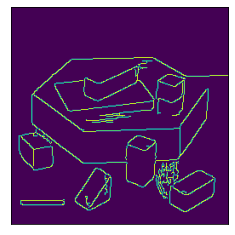

In [ ]:
image = cv.imread("/content/drive/MyDrive/ColabFiles/blox.jpg")
gray= cv.cvtColor(image,cv.COLOR_BGR2GRAY)

print("0.5, 0.2")
banana = cv.Canny(image, 0.5, 0.2)

plt.imshow(banana)
plt.xticks([]), plt.yticks([])
plt.show()

print("1, 255")
banana = cv.Canny(image, 1, 255)

plt.imshow(banana)
plt.xticks([]), plt.yticks([])
plt.show()

print("apertureSize = 3")
banana = cv.Canny(image, 1, 255, apertureSize = 3)

plt.imshow(banana)
plt.xticks([]), plt.yticks([])
plt.show()

print("L2gradient = True")
banana = cv.Canny(image, 1, 255, apertureSize = 3, L2gradient = True)

plt.imshow(banana)
plt.xticks([]), plt.yticks([])
plt.show()

[Fast](https://docs.opencv.org/3.4/df/d0c/tutorial_py_fast.html)

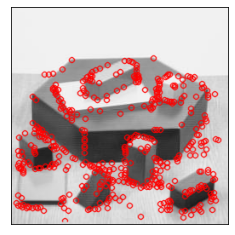

Disable nonmaxSuppression


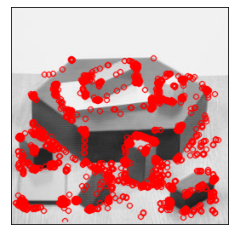

In [ ]:
image = cv.imread("/content/drive/MyDrive/ColabFiles/blox.jpg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

fast = cv.FastFeatureDetector_create()
kp = fast.detect(gray,None)
gray2 = cv.drawKeypoints(gray, kp, None, color=(255,0,0))

plt.imshow(gray2)
plt.xticks([]), plt.yticks([])
plt.show()

print("Disable nonmaxSuppression")
fast.setNonmaxSuppression(0)
kp = fast.detect(image, None)
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))

plt.imshow(img3)
plt.xticks([]), plt.yticks([])
plt.show()

[Surf e sift](https://stackoverflow.com/questions/37984709/how-to-use-surf-in-python)

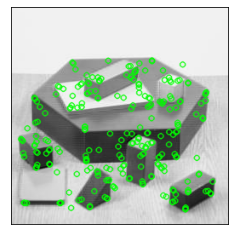

In [ ]:
img = cv.imread("/content/drive/MyDrive/ColabFiles/blox.jpg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

kaze = cv.KAZE_create(1)
(kps, descs) = kaze.detectAndCompute(gray, None)

img_1 = cv.drawKeypoints(img, kps, None, color=(0,255,0), flags=0)

plt.imshow(img_1)
plt.xticks([]), plt.yticks([])
plt.show()

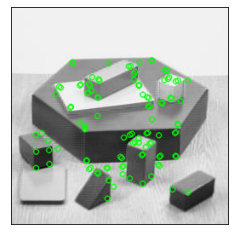

In [ ]:
img = cv.imread("/content/drive/MyDrive/ColabFiles/blox.jpg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

akaze = cv.AKAZE_create()
(kps, descs) = akaze.detectAndCompute(gray, None)

img_1 = cv.drawKeypoints(img, kps, None, color=(0,255,0), flags=0)

plt.imshow(img_1)
plt.xticks([]), plt.yticks([])
plt.show()

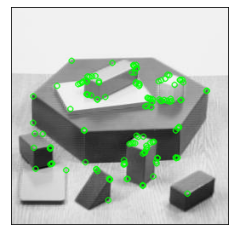

In [ ]:
img = cv.imread("/content/drive/MyDrive/ColabFiles/blox.jpg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

brisk = cv.BRISK_create()
(kps, descs) = brisk.detectAndCompute(gray, None)

img_1 = cv.drawKeypoints(img, kps, None, color=(0,255,0), flags=0)

plt.imshow(img_1)
plt.xticks([]), plt.yticks([])
plt.show()

[BRIEF](https://docs.opencv.org/3.4/dc/d7d/tutorial_py_brief.html)

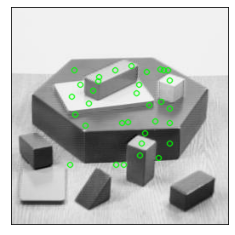

In [ ]:
img = cv.imread("/content/drive/MyDrive/ColabFiles/blox.jpg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kps = star.detect(img,None)
# compute the descriptors with BRIEF
kps, des = brief.compute(img, kps)

img_1 = cv.drawKeypoints(img, kps, None, color=(0,255,0), flags=0)

plt.imshow(img_1)
plt.xticks([]), plt.yticks([])
plt.show()

[ORB](https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html)

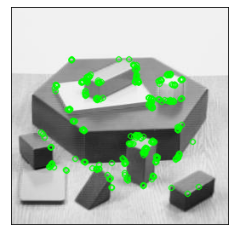

In [ ]:
img = cv.imread("/content/drive/MyDrive/ColabFiles/blox.jpg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kps = orb.detect(img,None)
# compute the descriptors with ORB
kps, des = orb.compute(img, kps)

img_1 = cv.drawKeypoints(img, kps, None, color=(0,255,0), flags=0)

plt.imshow(img_1)
plt.xticks([]), plt.yticks([])
plt.show()